<a href="https://colab.research.google.com/github/cristersom/Redesdecomputadores/blob/main/Trabalho_Redes_de_computadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Trabalho de Redes de Computadores - Manipulação de Sniffer_IPv4_IPv6 com Python**






#**Definição do Trabalho de Implementação**

##**Nome do Software**
*   Sniffer_IPv4_IPv6

##**Link da Biblioteca onde o Software é Disponibilizado**

 * [Sniffer_IPv4_IPv6](https://github.com/carlosefp/Sniffer_IPv4_IPv6)



##**Descrição do Software**
####**Finalidade**
O Sniffer_IPv4_IPv6 é um sniffer de pacotes desenvolvido em Python que permite a captura e análise de pacotes de rede para protocolos IPv4 e IPv6. É utilizado para monitoramento de rede, análise de tráfego e diagnóstico de problemas de rede.

####**Funcionalidades**
*   Captura de pacotes Ethernet.
*   Análise de pacotes IPv4 e IPv6.
*   Decodificação de pacotes ICMP, TCP e UDP.
*   Impressão dos detalhes dos pacotes capturados.
***negrito***
####**Linguagem**
Python

####**Ano de Desenvolvimento**
Ano de Desenvolvimento: 2023.

####**Data da Última Atualização**
Última alteração: 29 de junho 2023.

#**Diagrama Antes da Alteração**

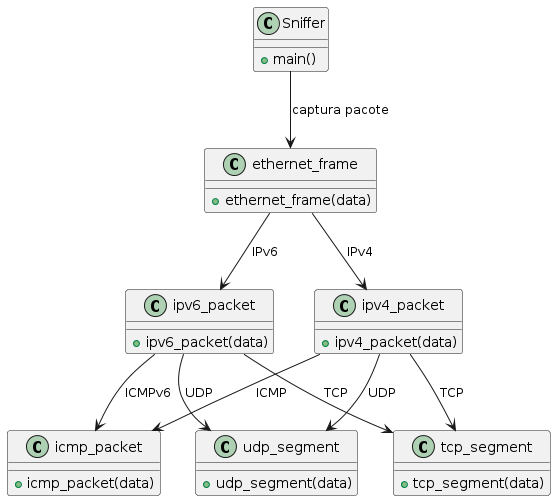


#**Código Original**

In [ ]:
import socket
import struct
import sys
import textwrap
import keyboard as kb


TAB_1 = '\t - '
TAB_2 = '\t\t - '
TAB_3 = '\t\t\t - '
TAB_4 = '\t\t\t\t - '


DATA_TAB_1 = '\t '
DATA_TAB_2 = '\t\t '
DATA_TAB_3 = '\t\t\t '
DATA_TAB_4 = '\t\t\t\t '




class HTTP:


   def __init__(self, raw_data):
       try:
           self.data = raw_data.decode('utf-8')
       except:
           self.data = raw_data




def main():
   try:
       sockFD = socket.socket(socket.AF_PACKET, socket.SOCK_RAW, socket.ntohs(3))


   except socket.error:
       print('Failed to create a socket')
       sys.exit()


   print('Socket created')
   arquivo = open('dadosRede.txt', 'w')
   count = True


   while True:
       if kb.is_pressed('e'):
           arquivo.close()
           break


       raw_data, addr = sockFD.recvfrom(65536)
       dest_mac, src_mac, eth_proto, data = ethernet_frame(raw_data)

       if count:
           print('Gerando dados... ')
           count = False


       # Check for IPV4
       if eth_proto == 8:
           version, header_length, ttl, proto, src, target, total_length, identification, flags_offset, checksum = ipv4_packet(data)

           arquivo.write('\n' + TAB_1 + 'IPv4 Packet:')
           arquivo.write('\n' + TAB_2 + 'Version: {}, Header Length: {}, TTL: {}'.format(version, header_length, ttl))
           arquivo.write('\n' + TAB_2 + 'Protocol: {}, Source: {}, Target: {}'.format(proto, src, target))
           arquivo.write('\n' + TAB_2 + 'Total Length: {}'.format(total_length))
           arquivo.write('\n' + TAB_2 + 'Identificador: {}, Flags: {}'.format(identification, flags_offset))


           if proto == 1:
               icmp_type, code, checksum, data = icmp_packet(data)
               arquivo.write('\n' + TAB_1 + 'ICMP Packet:')
               arquivo.write('\n' + TAB_2 + 'Type: {}, Code: {}, Checksum: {}, '.format(icmp_type, code, checksum))
               arquivo.write('\n' + TAB_2 + 'Data:')
               arquivo.write('\n' + format_multi_line(DATA_TAB_3, data))




           # TCP
           elif proto == 6:
               src_port, dest_port, sequence, ack, offset_reserved_flags, flag_urg, flag_ack, flag_psh, flag_rst, flag_syn, flag_fin, data = tcp_segment(
                   data)
               arquivo.write('\n' + TAB_1 + 'TCP Segment:')
               arquivo.write('\n' + TAB_2 + 'Source Port: {}, Destination Port: {}'.format(src_port, dest_port))
               arquivo.write('\n' + TAB_2 + 'Sequence: {}, Acknowledgment: {}'.format(sequence, ack))
               arquivo.write('\n' + TAB_2 + 'Flags:')
               arquivo.write('\n' + TAB_3 + 'URG: {}, ACK: {}, PSH: {}'.format(flag_urg, flag_ack, flag_psh))
               arquivo.write('\n' + TAB_3 + 'RST: {}, SYN: {}, FIN:{}'.format(flag_rst, flag_syn, flag_fin))
               arquivo.write('\n' + TAB_2 + 'Data:')


               if len(data) > 0:


                   # HTTP
                   if src_port == 80 or dest_port == 80:
                       arquivo.write('\n' + TAB_2 + 'HTTP Data:')
                       try:
                           http = HTTP(data)
                           http_info = str(http.data).split('\n')
                           for line in http_info:
                               arquivo.write('\n' + DATA_TAB_3 + str(line))
                       except:
                           arquivo.write('\n' + format_multi_line(DATA_TAB_3, data))


           # UDP
           elif proto == 17:
               src_port, dest_port, size, data = udp_segment(data)
               arquivo.write('\n' + TAB_1 + 'UDP Segment:')
               arquivo.write(
                   '\n' + TAB_2 + 'Source Port: {}, Destination Port: {}, Length: {}\n UDP Data: {}'.format(src_port,
                                                                                                            dest_port,
                                                                                                            size,
                                                                                                            data))


           # Other IPv4
           else:
               arquivo.write('\n' + TAB_1 + '\nOther IPv4 Data:')
               arquivo.write('\n' + format_multi_line(DATA_TAB_2, data))


       if eth_proto == 56710:
           version, traffic_flow, payload_length, next_header, hop_limit, src, target, data = ipv6_packet(data)
           arquivo.write('\n' + TAB_1 + 'IPv6 Packet:')
           arquivo.write(
               '\n' + TAB_2 + 'Version: {}, Traffic Flow: {}, Payload Length: {}'.format(version, traffic_flow,
                                                                                         payload_length))
           arquivo.write('\n' + TAB_2 + 'Hop Limit: {}, Source: {}, Target: {}'.format(hop_limit, src, target))
           arquivo.write('\n' + TAB_2 + 'NEXT HEADER: {}'.format(next_header))

           if next_header == 58:
               icmp_type, code, checksum, data = icmp_packet(data)
               arquivo.write('\n' + TAB_1 + 'ICMP Packet:')
               arquivo.write('\n' + TAB_2 + 'Type: {}, Code: {}, Checksum: {}, '.format(icmp_type, code, checksum))
               arquivo.write('\n' + TAB_2 + 'Data:')
               arquivo.write('\n' + format_multi_line(DATA_TAB_3, data))


           # TCP
           elif next_header == 6:
               src_port, dest_port, sequence, ack, offset_reserved_flags, flag_urg, flag_ack, flag_psh, flag_rst, flag_syn, flag_fin, data = tcp_segment(
                   data)
               arquivo.write('\n' + TAB_1 + 'TCP Segment:')
               arquivo.write('\n' + TAB_2 + 'Source Port: {}, Destination Port: {}'.format(src_port, dest_port))
               arquivo.write('\n' + TAB_2 + 'Sequence: {}, Acknowledgment: {}'.format(sequence, ack))
               arquivo.write('\n' + TAB_2 + 'Flags:')
               arquivo.write('\n' + TAB_3 + 'URG: {}, ACK: {}, PSH: {}'.format(flag_urg, flag_ack, flag_psh))
               arquivo.write('\n' + TAB_3 + 'RST: {}, SYN: {}, FIN:{}'.format(flag_rst, flag_syn, flag_fin))
               arquivo.write('\n' + TAB_2 + 'Data:')


               if len(data) > 0:


                   # HTTP
                   if src_port == 80 or dest_port == 80:
                       arquivo.write('\n' + TAB_2 + '\nHTTP Data:')
                       try:
                           http = HTTP(data)
                           http_info = str(http.data).split('\n')
                           for line in http_info:
                               arquivo.write('\n' + DATA_TAB_3 + str(line))
                       except:
                           arquivo.write('\n' + format_multi_line(DATA_TAB_3, data))


           # UDP
           elif next_header == 17:
               src_port, dest_port, size, data = udp_segment(data)
               arquivo.write('\n' + TAB_1 + 'UDP Segment:')
               arquivo.write(
                   '\n' + TAB_2 + 'Source Port: {}, Destination Port: {}, Length: {} \n UDP-Data:'.format(src_port,
                                                                                                          dest_port,
                                                                                                          size, data))


           elif next_header == 33:
               icmp_type, code, checksum, data = icmp_packet(data)
               arquivo.write('\n' + TAB_1 + 'IPv6 Routing Header:')
               arquivo.write('\n' + TAB_2 + 'Type: {}, Code: {}, Checksum: {}, '.format(icmp_type, code, checksum))
               arquivo.write('\n' + TAB_2 + 'Data:')
               arquivo.write('\n' + format_multi_line(DATA_TAB_3, data))


           elif next_header == 46:
               icmp_type, code, checksum, data = icmp_packet(data)
               arquivo.write('\n' + TAB_1 + 'IPv6 Encapsulating Security Payload:')
               arquivo.write('\n' + TAB_2 + 'Type: {}, Code: {}, Checksum: {}, '.format(icmp_type, code, checksum))
               arquivo.write('\n' + TAB_2 + 'Data:')
               arquivo.write('\n' + format_multi_line(DATA_TAB_3, data))




# Unpack the ethernet frame
def ethernet_frame(data):
   dest_mac, src_mac, proto = struct.unpack('! 6s 6s H', data[:14])
   return get_mac_addr(dest_mac), get_mac_addr(src_mac), socket.htons(proto), data[14:]




# Return a formatted mac address (ie AA:BB:CC:DD:EE:FF)
def get_mac_addr(bytes_addr):
   bytes_str = map('{:02x}'.format, bytes_addr)
   return ':'.join(bytes_str).upper()



def ipv4_packet(data):
    version_header_length = data[0]
    version = version_header_length >> 4
    header_length = (version_header_length & 15) * 4
    ttl, proto, src, target = struct.unpack('! 8x B B 2x 4s 4s', data[:20])

    total_length, identification, flags_frag_offset = struct.unpack('! H H H', data[2:8])
    ttl, proto, checksum = struct.unpack('! B B H', data[8:12])
    src_address = struct.unpack('! 4s', data[12:16])[0]
    target_address = struct.unpack('! 4s', data[16:20])[0]

    src_address = ipv4(src_address)
    target_address = ipv4(target_address)

    return version, header_length, ttl, proto, src_address, target_address, total_length, identification, flags_frag_offset, data[header_length:]


# Return properly formatted IPv4 address
def ipv4(addr):
   return '.'.join(map(str, addr))




# Unpack ICMP packet
def icmp_packet(data):
   icmp_type, code, checksum = struct.unpack('! B B H', data[:4])
   return icmp_type, code, checksum, data[4:]




# Unpacks TCP packet
def tcp_segment(data):
   (src_port, dest_port, sequence, ack, offset_reserved_flags) = struct.unpack('! H H L L H', data[:14])
   offset = (offset_reserved_flags >> 12) * 4
   flag_urg = (offset_reserved_flags & 32) >> 5
   flag_ack = (offset_reserved_flags & 16) >> 4
   flag_psh = (offset_reserved_flags & 8) >> 3
   flag_rst = (offset_reserved_flags & 4) >> 2
   flag_syn = (offset_reserved_flags & 2) >> 1
   flag_fin = offset_reserved_flags & 1
   return src_port, dest_port, sequence, ack, offset_reserved_flags, flag_urg, flag_ack, flag_psh, flag_rst, flag_syn, flag_fin, data[
                                                                                                                                 offset:]




# Unpack UDP segments
def udp_segment(data):
   src_port, dest_port, size = struct.unpack('! H H 2x H', data[:8])
   return src_port, dest_port, size, data[:8]




# Format multi-line data
def format_multi_line(prefix, string, size=80):
   size -= len(prefix)
   if isinstance(string, bytes):
       string = ''.join(r'\x{:02x}'.format(byte) for byte in string)
       if size % 2:
           size -= 1
   return '\n'.join([prefix + line for line in textwrap.wrap(string, size)])




def ipv6_packet(data):
   version_traffic_flow = struct.unpack('! I', data[:4])
   version = (version_traffic_flow[0] >> 28) & 0x0F
   traffic_flow = version_traffic_flow[0] & 0xFFFFFFF
   payload_length, next_header, hop_limit = struct.unpack('! H B B', data[4:8])
   src = data[8:24]
   target = data[24:40]
   return version, traffic_flow, payload_length, next_header, hop_limit, ipv6(src), ipv6(target), data[40:]




# Return properly formatted IPv6 address
def ipv6(addr):
   parts = [addr[i:i + 2].hex() for i in range(0, len(addr), 2)]
   return ':'.join(parts)




if __name__ == '__main__':
   # TEM QUE RODAR COMO SUDOER
   main()

#**Implementação da Nova Funcionalidade**

##**Descrição Detalhada da Nova Funcionalidade**

A nova funcionalidade adicionada ao Sniffer_IPv4_IPv6 inclui:

1.   **Análise de Flags TCP**: A função **analyze_tcp_flags** foi adicionada para extrair e analisar as flags dos pacotes TCP (URG, ACK, PSH, RST, SYN, FIN).
2.   **Cálculo de Latência entre Pacotes TCP SYN/ACK**: A função **log_latency** foi adicionada para calcular e registrar a latência entre pacotes TCP SYN e ACK, uma métrica importante para analisar a performance da rede.

##**O que Foi Alterado no Software**

*   **Arquivo Principal Sniffer_IPv4_IPv6.py**: Modificado para incluir a análise de flags TCP e cálculo de latência.
*   **Novas Funções**: **analyze_tcp_flags** e **log_latency**.
*   **Modificação da Função main**: Para integrar as novas funções e registrar estatísticas detalhadas.



#**Descrição das Funções e Classes Desenvolvidas**
####**Função analyze_tcp_flags**
A função analyze_tcp_flags recebe um segmento TCP e extrai as flags TCP. Essas flags são utilizadas para entender o estado de uma conexão TCP e diagnosticar problemas de rede.

In [ ]:
def analyze_tcp_flags(data):
    (src_port, dest_port, sequence, acknowledgment, offset_reserved_flags) = struct.unpack('! H H L L H', data[:14])
    offset = (offset_reserved_flags >> 12) * 4
    flags = offset_reserved_flags & 0x3F
    flag_urg = (flags & 0x20) >> 5
    flag_ack = (flags & 0x10) >> 4
    flag_psh = (flags & 0x08) >> 3
    flag_rst = (flags & 0x04) >> 2
    flag_syn = (flags & 0x02) >> 1
    flag_fin = flags & 0x01

    return {
        "URG": flag_urg,
        "ACK": flag_ack,
        "PSH": flag_psh,
        "RST": flag_rst,
        "SYN": flag_syn,
        "FIN": flag_fin
    }

####**Explicação**
A função desempacota os dados do cabeçalho TCP utilizando a biblioteca **struct** e extrai as flags relevantes. As flags são retornadas como um dicionário para fácil acesso e análise.

####**Função log_latency**
A função **log_latency** registra o timestamp dos pacotes SYN e calcula a latência quando um pacote ACK correspondente é recebido. A latência é registrada em um arquivo de log.

In [ ]:
syn_time = None
def log_latency(timestamp, flag_syn, flag_ack):
    global syn_time
    if flag_syn and not flag_ack:
        syn_time = timestamp
    elif flag_ack and syn_time:
        latency = timestamp - syn_time
        with open("latency_log.txt", "a") as f:
            f.write(f"Latency: {latency} seconds\n")
        syn_time = None

####**Explicação**
A função utiliza uma variável global **syn_time** para armazenar o timestamp do pacote SYN. Quando um pacote ACK é recebido, a latência é calculada subtraindo o timestamp atual de **syn_time** e o resultado é registrado em um arquivo de log.

#**Explicação Adicional sobre a Manipulação dos Dados do Cabeçalho**
A manipulação dos dados do cabeçalho é um requisito obrigatório do trabalho e foi realizada através das seguintes funções:



1.   **analyze_tcp_flags**
Esta função extrai e analisa as flags do cabeçalho TCP. As flags TCP (URG, ACK, PSH, RST, SYN, FIN) são essenciais para determinar o estado de uma conexão TCP e diagnosticar problemas de rede, como conexões falhas ou ataques SYN flood. A manipulação dessas flags permite monitorar o comportamento dos pacotes TCP e avaliar a qualidade e segurança da rede.

2.   **log_latency**
A função **log_latency** calcula a latência entre pacotes TCP SYN e ACK. A latência é uma métrica crucial para avaliar a performance da rede, pois indica o tempo que um pacote leva para ir de um ponto a outro na rede. Ao registrar a latência entre pacotes SYN e ACK, é possível identificar problemas de desempenho e otimizar a rede para garantir uma comunicação mais rápida e eficiente.

Estas manipulações foram realizadas para atender aos objetivos do software, fornecendo análises mais detalhadas e precisas sobre o tráfego de rede, o que é fundamental para o gerenciamento e otimização de redes de computadores.

#Diagrama Depois da Alteração
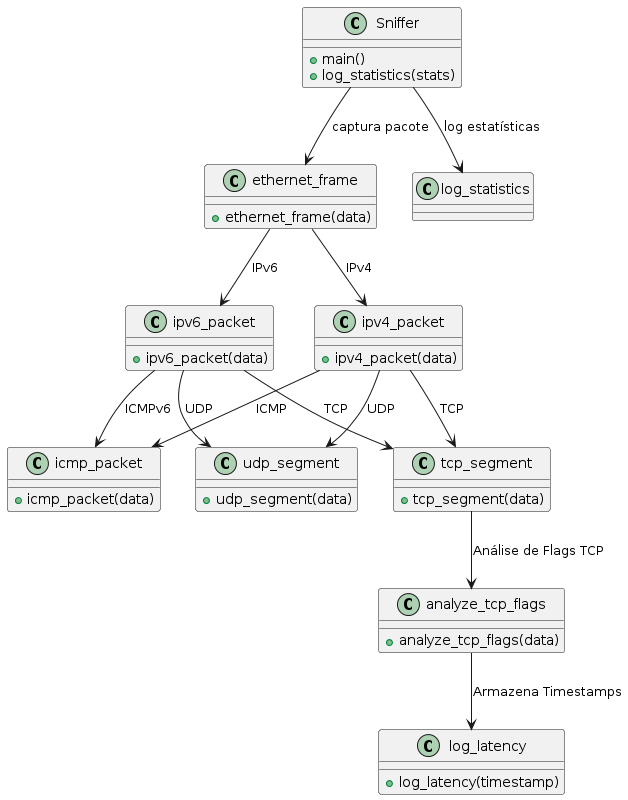

#**Código Completo do Software Modificado**


In [ ]:
import socket
import struct
import textwrap
import time

# Função para capturar pacotes Ethernet
def ethernet_frame(data):
    dest_mac, src_mac, proto = struct.unpack('! 6s 6s H', data[:14])
    return get_mac_addr(dest_mac), get_mac_addr(src_mac), socket.htons(proto), data[14:]

# Função para formatar endereço MAC
def get_mac_addr(bytes_addr):
    bytes_str = map('{:02x}'.format, bytes_addr)
    return ':'.join(bytes_str).upper()

# Função para capturar pacotes IPv4
def ipv4_packet(data):
    version_header_length = data[0]
    version = version_header_length >> 4
    header_length = (version_header_length & 15) * 4
    ttl, proto, src, target = struct.unpack('! 8x B B 2x 4s 4s', data[:20])
    src = ipv4(src)
    target = ipv4(target)
    total_length, identification, flags_offset, checksum = struct.unpack('! H H H H', data[20:28])
    return version, header_length, ttl, proto, src, target, total_length, identification, flags_offset, checksum, data[header_length:]

# Função para formatar endereço IPv4
def ipv4(addr):
    return '.'.join(map(str, addr))

# Função para capturar pacotes IPv6
def ipv6_packet(data):
    version_traffic_class_flow_label = struct.unpack('! I', data[:4])[0]
    version = version_traffic_class_flow_label >> 28
    payload_length, next_header, hop_limit = struct.unpack('! H B B', data[4:8])
    src = ipv6(data[8:24])
    target = ipv6(data[24:40])
    return version, payload_length, next_header, hop_limit, src, target, data[40:]

# Função para formatar endereço IPv6
def ipv6(addr):
    addr_str = ''.join('{:02x}'.format(byte) for byte in addr)
    return ':'.join([addr_str[i:i + 4] for i in range(0, len(addr_str), 4)])

# Função para capturar pacotes ICMP
def icmp_packet(data):
    icmp_type, code, checksum = struct.unpack('! B B H', data[:4])
    return icmp_type, code, checksum, data[4:]

# Função para capturar segmentos TCP
def tcp_segment(data):
    (src_port, dest_port, sequence, acknowledgment, offset_reserved_flags) = struct.unpack('! H H L L H', data[:14])
    offset = (offset_reserved_flags >> 12) * 4
    flags = offset_reserved_flags & 0x3F
    flag_urg = (flags & 0x20) >> 5
    flag_ack = (flags & 0x10) >> 4
    flag_psh = (flags & 0x08) >> 3
    flag_rst = (flags & 0x04) >> 2
    flag_syn = (flags & 0x02) >> 1
    flag_fin = flags & 0x01
    return src_port, dest_port, sequence, acknowledgment, flag_urg, flag_ack, flag_psh, flag_rst, flag_syn, flag_fin, data[offset:]

# Função para capturar segmentos UDP
def udp_segment(data):
    src_port, dest_port, size = struct.unpack('! H H 2x H', data[:8])
    return src_port, dest_port, size, data[8:]

# Função para formatar múltiplas linhas de dados
def format_multi_line(prefix, string, size=80):
    size -= len(prefix)
    if isinstance(string, bytes):
        string = ''.join(r'\x{:02x}'.format(byte) for byte in string)
        if size % 2:
            size -= 1
    return '\n'.join([prefix + line for line in textwrap.wrap(string, size)])

# Função para analisar flags TCP
def analyze_tcp_flags(data):
    (src_port, dest_port, sequence, acknowledgment, offset_reserved_flags) = struct.unpack('! H H L L H', data[:14])
    offset = (offset_reserved_flags >> 12) * 4
    flags = offset_reserved_flags & 0x3F
    flag_urg = (flags & 0x20) >> 5
    flag_ack = (flags & 0x10) >> 4
    flag_psh = (flags & 0x08) >> 3
    flag_rst = (flags & 0x04) >> 2
    flag_syn = (flags & 0x02) >> 1
    flag_fin = flags & 0x01

    return {
        "URG": flag_urg,
        "ACK": flag_ack,
        "PSH": flag_psh,
        "RST": flag_rst,
        "SYN": flag_syn,
        "FIN": flag_fin
    }

# Função para calcular e registrar latência entre pacotes TCP SYN e ACK
syn_time = None
def log_latency(timestamp, flag_syn, flag_ack):
    global syn_time
    if flag_syn and not flag_ack:
        syn_time = timestamp
    elif flag_ack and syn_time:
        latency = timestamp - syn_time
        with open("latency_log.txt", "a") as f:
            f.write(f"Latency: {latency} seconds\n")
        syn_time = None

# Função principal
def main():
    conn = socket.socket(socket.AF_PACKET, socket.SOCK_RAW, socket.ntohs(3))

    while True:
        raw_data, addr = conn.recvfrom(65536)
        eth = ethernet_frame(raw_data)
        print('\nEthernet Frame:')
        print(f'Destination: {eth[0]}, Source: {eth[1]}, Protocol: {eth[2]}')

        # IPv4
        if eth[2] == 8:
            ipv4 = ipv4_packet(eth[3])
            print(f'\nIPv4 Packet:')
            print(f'Version: {ipv4[0]}, Header Length: {ipv4[1]}, TTL: {ipv4[2]}')
            print(f'Protocol: {ipv4[3]}, Source: {ipv4[4]}, Target: {ipv4[5]}')
            print(f'Total Length: {ipv4[6]}, Identification: {ipv4[7]}, Flags-Offset: {ipv4[8]}, Checksum: {ipv4[9]}')

            # ICMP
            if ipv4[3] == 1:
                icmp = icmp_packet(ipv4[10])
                print(f'\nICMP Packet:')
                print(f'Type: {icmp[0]}, Code: {icmp[1]}, Checksum: {icmp[2]}')
                print(f'Data:')
                print(format_multi_line('\t', icmp[3]))

            # TCP
            elif ipv4[3] == 6:
                tcp = tcp_segment(ipv4[10])
                flags = analyze_tcp_flags(ipv4[10])
                timestamp = time.time()
                log_latency(timestamp, flags["SYN"], flags["ACK"])
                print(f'\nTCP Segment:')
                print(f'Source Port: {tcp[0]}, Destination Port: {tcp[1]}')
                print(f'Sequence: {tcp[2]}, Acknowledgment: {tcp[3]}')
                print(f'Flags:')
                print(f'URG: {tcp[4]}, ACK: {tcp[5]}, PSH: {tcp[6]}')
                print(f'RST: {tcp[7]}, SYN: {tcp[8]}, FIN: {tcp[9]}')
                print(f'Data:')
                print(format_multi_line('\t', tcp[10]))

            # UDP
            elif ipv4[3] == 17:
                udp = udp_segment(ipv4[10])
                print(f'\nUDP Segment:')
                print(f'Source Port: {udp[0]}, Destination Port: {udp[1]}, Length: {udp[2]}')
                print(f'Data:')
                print(format_multi_line('\t', udp[3]))

        # IPv6
        elif eth[2] == 56710:
            ipv6 = ipv6_packet(eth[3])
            print(f'\nIPv6 Packet:')
            print(f'Version: {ipv6[0]}, Payload Length: {ipv6[1]}, Next Header: {ipv6[2]}')
            print(f'Hop Limit: {ipv6[3]}, Source: {ipv6[4]}, Target: {ipv6[5]}')

            # ICMPv6
            if ipv6[2] == 58:
                icmp = icmp_packet(ipv6[6])
                print(f'\nICMPv6 Packet:')
                print(f'Type: {icmp[0]}, Code: {icmp[1]}, Checksum: {icmp[2]}')
                print(f'Data:')
                print(format_multi_line('\t', icmp[3]))

            # TCP
            elif ipv6[2] == 6:
                tcp = tcp_segment(ipv6[6])
                flags = analyze_tcp_flags(ipv6[6])
                timestamp = time.time()
                log_latency(timestamp, flags["SYN"], flags["ACK"])
                print(f'\nTCP Segment:')
                print(f'Source Port: {tcp[0]}, Destination Port: {tcp[1]}')
                print(f'Sequence: {tcp[2]}, Acknowledgment: {tcp[3]}')
                print(f'Flags:')
                print(f'URG: {tcp[4]}, ACK: {tcp[5]}, PSH: {tcp[6]}')
                print(f'RST: {tcp[7]}, SYN: {tcp[8]}, FIN: {tcp[9]}')
                print(f'Data:')
                print(format_multi_line('\t', tcp[10]))

            # UDP
            elif ipv6[2] == 17:
                udp = udp_segment(ipv6[6])
                print(f'\nUDP Segment:')
                print(f'Source Port: {udp[0]}, Destination Port: {udp[1]}, Length: {udp[2]}')
                print(f'Data:')
                print(format_multi_line('\t', udp[3]))

if __name__ == '__main__':
    main()


#**Conclusão**
A manipulação dos dados dos cabeçalhos dos protocolos TCP visa fornecer insights mais detalhados sobre o tráfego de rede, permitindo uma análise precisa do desempenho e da segurança da rede. O registro da latência entre pacotes TCP SYN e ACK é crucial para identificar problemas de desempenho e otimizar a comunicação na rede.

Com essas alterações, o sniffer agora é capaz de realizar análises mais detalhadas dos pacotes TCP e registrar a latência, proporcionando uma ferramenta valiosa para administradores de rede e pesquisadores. A documentação detalhada, juntamente com os diagramas atualizados, garante que a funcionalidade implementada está clara e alinhada com os objetivos do software escolhido.